In [1219]:
import random
import matplotlib.pyplot as plt
# массив данных для случайного числа
pool = ['0','1']
# начало бинарной строки
start_of_binary_string = '0b'
# автоматная функция
func = lambda x,y: ((x * 3) ** 2) |  5 ^ ((y * x + y ** 3) % 10 ^ (5 * x) + 15 * y **3)

In [1220]:
def f(a, b):
    return func(eval(start_of_binary_string + a),eval(start_of_binary_string + b))

In [1221]:
# вспомогательная функция
def help(a, b, m):
    # приводим к целым числам
    # применяем функцию
    # возвращаем в строковое представление число для получения бинарной строки m последних справа разрядов
    return (bin(f(a, b)).replace(start_of_binary_string, ''))[-m:]

In [1222]:
# Функция хеширования, применяющая вспомогательную функцию
def H(a, h, m):
    return help(a, h, m)

In [1223]:
# функция, дополняющая незначащами нулями исходную строку
def fill_zeros(w, m):
    # если длины строки не хватает для всех подстрок длины m
    if len(w) % m !=0:
        # дозаполняем незначащами нулями
        return w.zfill(len(w) + (m - (len(w) % m)))
    else:
        return w

In [1224]:
def hash(h0, w, m):
    # массив, хранящий итерации хеширования
    h = [h0]
    # дозаполняем нулями строку, если её длины не хватает и переворачиваем
    w = fill_zeros(w, m)[::-1]
    # определяем число итераций
    iters = int(len(w) / m)
    for i in range(iters):
        # записываем итерацию хеширования
        h.append(H(w[i * m:(i*m + m)][::-1], h[-1], m))
    return h[-1]
    

In [1225]:
# функция создания случайной бинарной строки длины m
def random_binary_string(m):
    return ''.join(random.choices(pool, k=m))

In [1226]:
# функция преобразования в единичный квадрат
def to_I(array, m):
    return [(eval('0b' + i) % (2 ** m)) / (2 ** m) for i in array]

In [1227]:
# функция построения графика автоматной функции
def automata_projection(h0, m):
    # записываем в x случайную бинарную строку, являющейся входным словом
    x = [random_binary_string(5 * m)]
    print("w0=", x[0])
    # записываем результат применения хеш-функции
    y = [hash(h0, x[-1], m)]
    # вычисляем 2 ^ k - 1 значений
    for _ in range(2 ** m - 1):
        calc = hash(h0, y[-1], m)
        y.append(calc)
        x.append(y[-1])
    # преобразуем точки в единичный квадрат
    x = to_I(x, m)
    y = to_I(y, m)
    # выводим график
    return plt.scatter(x, y)

In [1228]:
len_w = 19
w = '1011111101111011101'
m = 4
h0 = '0101'
hash(h0, w, 4)


'0001'

w0= 01111000111111010110
h0 =  0101


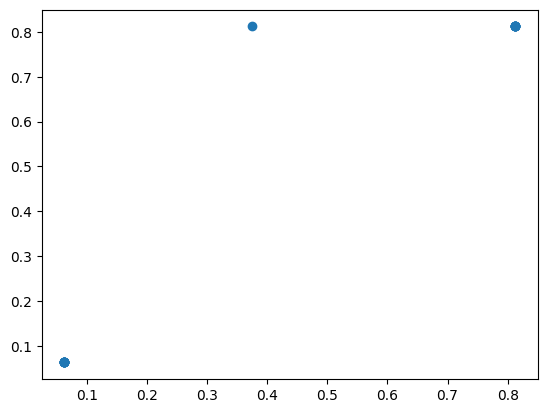

In [1232]:
random_h0 = random_binary_string(4)
automata_projection(random_h0, 4)
print("h0 = ",random_h0)

w0= 1100110011010101000011100001010000010100
h0 =  11010100


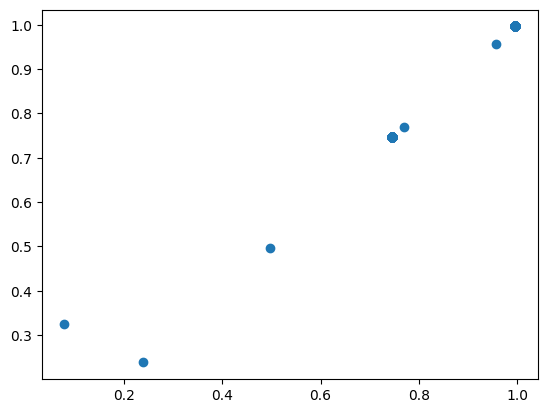

In [1295]:
random_h0 = random_binary_string(8)
automata_projection(random_h0, 8)
print("h0 = ",random_h0)

w0= 11110010011011001101100101010001100011100011001010111001111100111101101101010101
h0 =  1111000100001101


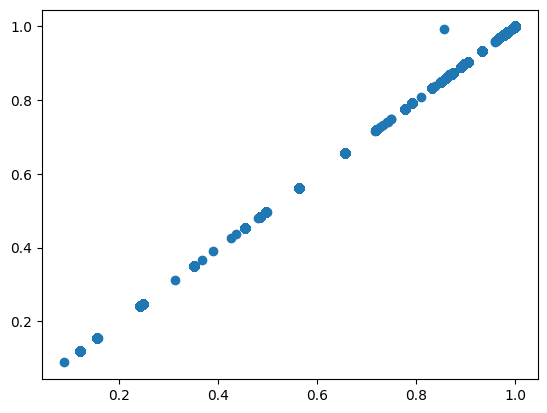

In [1305]:
random_h0 = random_binary_string(16)
automata_projection(random_h0, 16)
print("h0 = ",random_h0)